In [1]:
"""Show the results of the optimization on the VLSE benchmark."""

# Copyright (c) 2025 Alliance for Sustainable Energy, LLC

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__deprecated__ = False

# VLSE benchmark results

This notebook is used to read results generated by [vlse_bench.py](vlse_bench.py). The results are Pickle files that contain information about the optimization runs. Each file concerns a single problem and a single algorithm, used to solve the problem. Mind that filenames ending with `default` use the default bounds for a problem, and filenames ending with `bounds` use user-defined bounds.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from vlse_bench import myFuncs
boundflag = "default"

myFuncStr = (
    "branin",
    "hart3",
    "hart6",
    "shekel",
    "ackley",
    "levy",
    "powell",
    "michal",
    "spheref",
    "rastr",
    "mccorm",
    "bukin6",
    "camel6",
)
myAlgorithmStrPickle = ["SRS", "DYCORS", "CPTV", "CPTVl"]
myAlgorithmStr = ["Multistart MSRS", "DYCORS", "CPTV", "CPTVl"]

nTrials = 0
optres = {}
exectime = {}
maxIter = {}
myNArgs = {}
minVal = {}

In [3]:
import sys
import blackboxoptim

# Comment out if using new versions of this repo (>= v1.0)
sys.modules["blackboxopt"] = blackboxoptim

# Initialize algorithm specific dictionaries
for i in range(len(myAlgorithmStr)):
    a = myAlgorithmStr[i]
    pickle_a = myAlgorithmStrPickle[i]
    optres[a] = {}
    exectime[a] = {}
    for rFunc in myFuncStr:
        optres[a][rFunc] = []
        exectime[a][rFunc] = 0.0
        with open(
            "pickle/" + rFunc + "_" + pickle_a + "_" + boundflag + ".pkl", "rb"
        ) as f:
            (
                _,
                _,
                nTrials,
                optres[a][rFunc],
                exectime[a][rFunc],
                _,
            ) = pickle.load(f)

# Initialize the remaining dictionaries with data from one of the algorithms
for rFunc in myFuncStr:
    maxIter[rFunc] = optres["DYCORS"][rFunc][0].nit
    for i in range(nTrials):
        assert maxIter[rFunc] == optres["DYCORS"][rFunc][i].nit
    myNArgs[rFunc] = len(myFuncs[rFunc].domain())
    minVal[rFunc] = myFuncs[rFunc].min()

For each problem, we can plot the average best values an algorithm obtain per function evaluation. We can also compare the minimum values found by the algorithms with the known minimum values for each problem.

Problem branin
Minimum known value: 0.397887
Minimum observed value: 0.397887357757309 at [-3.14159258 12.27499457]
Average best value for Multistart MSRS: 0.39788879545590444
Average best value for DYCORS: 0.3978873820455438
Average best value for CPTV: 0.39788746507631423
Average best value for CPTVl: 0.3978874021371019


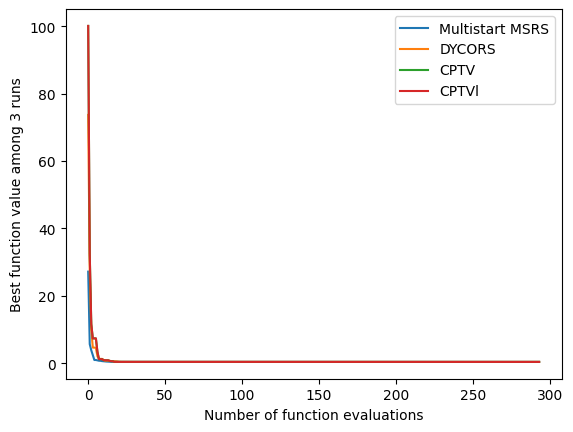

Problem hart3
Minimum known value: -3.86278
Minimum observed value: -3.8627797858897206 at [0.11459108 0.55564286 0.85254546]
Average best value for Multistart MSRS: -3.7936632971703097
Average best value for DYCORS: -3.862779767265105
Average best value for CPTV: -3.862778384387886
Average best value for CPTVl: -3.8627797858613064


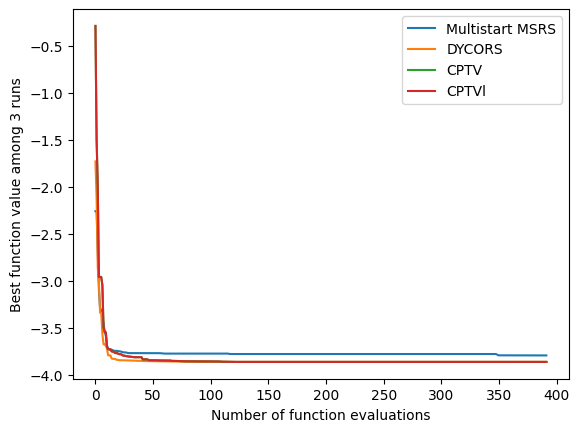

Problem hart6
Minimum known value: -3.04245876289
Minimum observed value: -3.0424577360623877 at [0.20169613 0.15001504 0.47687537 0.27533872 0.31164595 0.65729995]
Average best value for Multistart MSRS: -2.9876779785731507
Average best value for DYCORS: -3.0014923432199736
Average best value for CPTV: -3.001485742969971
Average best value for CPTVl: -3.001493439337338


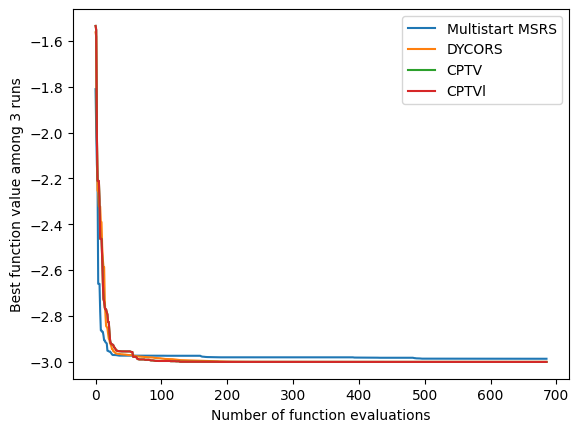

Problem shekel
Minimum known value: -10.53644315348353
Minimum observed value: -10.535523142270216 at [4.00249066 4.00190617 4.00100049 3.99892053]
Average best value for Multistart MSRS: -6.225035174049379
Average best value for DYCORS: -3.58273855589024
Average best value for CPTV: -3.582737698737948
Average best value for CPTVl: -3.5827386063770734


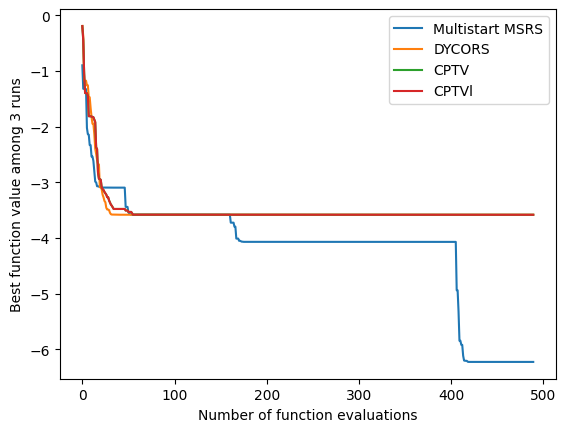

Problem ackley
Minimum known value: 0.0
Minimum observed value: 3.241851231905457e-14 at [-4.78718627e-15 -1.41388637e-14 -7.70228065e-15 -5.56114399e-15
 -1.39298837e-14 -3.77307777e-15 -3.60475538e-15 -4.03171420e-15
 -5.94446367e-15 -1.14797494e-14 -1.12072894e-14 -4.83185540e-15
 -4.43568793e-15 -5.07742719e-15 -1.53657469e-14]
Average best value for Multistart MSRS: 2.2230627262222247
Average best value for DYCORS: 6.979507858580665e-05
Average best value for CPTV: 0.00016138150771209206
Average best value for CPTVl: 3.833970178372207e-14


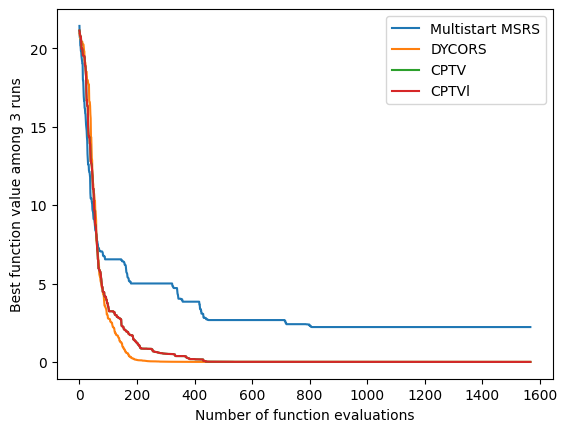

Problem levy
Minimum known value: 0.0
Minimum observed value: 8.593167933573097e-10 at [0.9999996  0.99999031 0.99999031 0.99999031 0.99999031 0.99999031
 0.99999031 0.99999031 0.99999031 0.99999031 0.99999031 0.99999031
 0.99999031 0.99999031 0.99999031 0.99999031 0.99999031 0.99999031
 0.99999031 0.99999039]
Average best value for Multistart MSRS: 6.795319576402657
Average best value for DYCORS: 9.721394390703184
Average best value for CPTV: 1.7183939419974787
Average best value for CPTVl: 8.593167933600522e-10


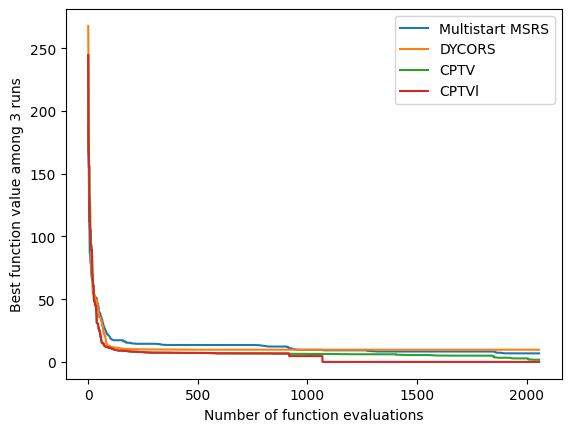

Problem powell
Minimum known value: 0.0
Minimum observed value: 0.00043756153147827864 at [-0.00755025  0.0007507  -0.01740733 -0.01740301 -0.02552824  0.00258992
  0.03123319  0.02970486  0.05044913 -0.00523789  0.00194851  0.00374202
 -0.05063991  0.00503744 -0.05414063 -0.05385154 -0.04441336  0.00436359
 -0.01983128 -0.01908864  0.07832603 -0.007808    0.03705981  0.03760845]
Average best value for Multistart MSRS: 34.31146932920356
Average best value for DYCORS: 0.018771822130279833
Average best value for CPTV: 0.04963321353376379
Average best value for CPTVl: 0.07697185188057791


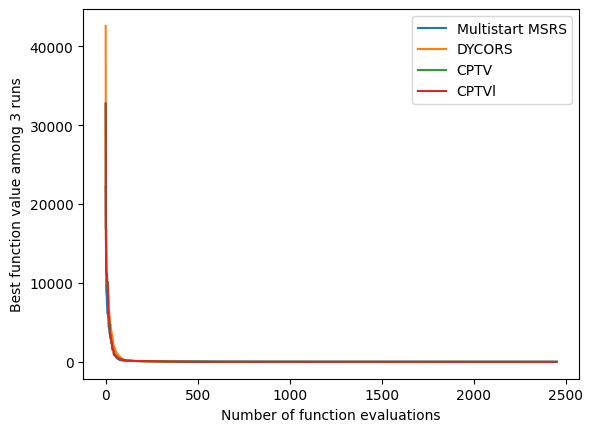

Problem michal
Minimum known value: -19.6370136
Minimum observed value: -17.9588824763832 at [2.20395097 1.57594488 1.28459946 1.92078912 0.99554313 0.90959386
 1.45516517 1.36125323 1.26460019 1.57244503 1.77118698 1.69649108
 1.06495524 0.59526009 1.28355101 1.84171235 1.42681614 2.02893232
 1.3486809  2.38206872]
Average best value for Multistart MSRS: -10.206669951351573
Average best value for DYCORS: -14.83211420318893
Average best value for CPTV: -17.409183253129022
Average best value for CPTVl: -17.40915520350992


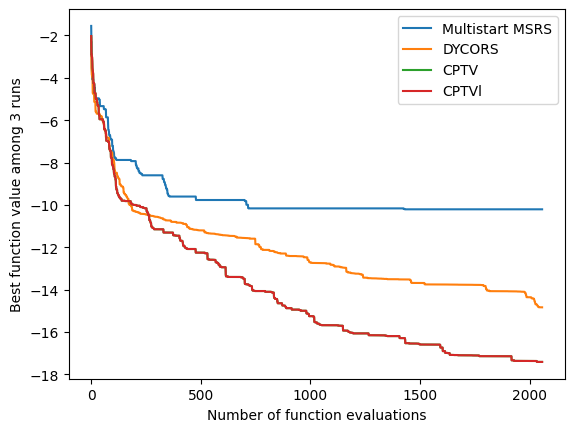

Problem spheref
Minimum known value: 0.0
Minimum observed value: 1.0857618140579174e-31 at [-2.60208521e-17 -6.85215773e-17 -8.50014503e-17 -5.03069808e-17
  1.38777878e-17 -9.54097912e-17 -9.58434720e-17 -1.10154941e-16
 -2.94902991e-17  1.20563282e-16  6.24500451e-17  5.20417043e-17
  2.68882139e-17 -3.12250226e-17  6.24500451e-17 -1.21430643e-17
  1.47451495e-17 -2.16840434e-17  2.42861287e-17 -2.94902991e-17
 -4.16333634e-17 -1.01481323e-16  2.60208521e-18 -2.47198095e-17
  1.02348685e-16  1.90819582e-17 -9.71445147e-17]
Average best value for Multistart MSRS: 0.005944639757755145
Average best value for DYCORS: 1.3958596451387591e-06
Average best value for CPTV: 2.4076790768802605e-06
Average best value for CPTVl: 1.4484866136124325e-31


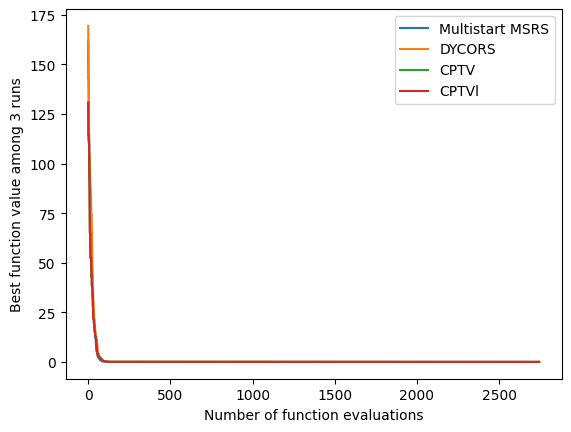

Problem rastr
Minimum known value: 0.0
Minimum observed value: 0.0 at [1.72084569e-14 5.55111512e-15 1.13242749e-14 5.55111512e-15
 5.77315973e-15 5.77315973e-15 5.69596453e-15 5.55111512e-15
 1.13242749e-14 1.13242749e-14 1.13242749e-14 5.44009282e-15
 1.70974346e-14 5.54938040e-15 5.66213743e-15 5.77315973e-15
 5.44009282e-15 5.77315973e-15 5.44009282e-15 5.66213743e-15
 1.13242749e-14 5.77315973e-15 5.55111512e-15 1.70974346e-14
 1.13242749e-14 5.55111512e-15 1.71772319e-14 5.75754722e-15
 1.70974346e-14 1.13242749e-14]
Average best value for Multistart MSRS: 139.21559892619203
Average best value for DYCORS: 135.97754206077522
Average best value for CPTV: 18.272793427561947
Average best value for CPTVl: 0.0


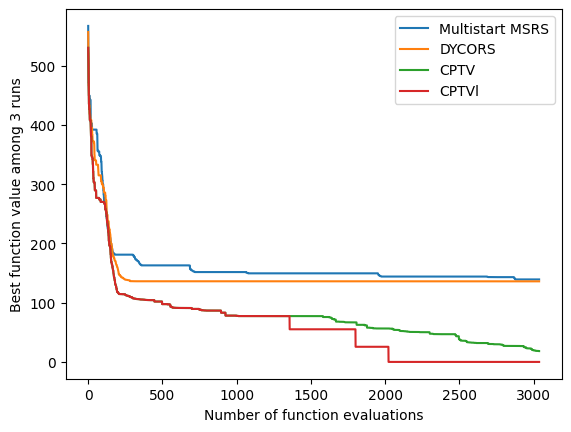

Problem mccorm
Minimum known value: -1.9133
Minimum observed value: -1.9132229548384152 at [-0.54720818 -1.5471997 ]
Average best value for Multistart MSRS: -0.8660253442775424
Average best value for DYCORS: -1.913222953741565
Average best value for CPTV: -1.913222821727078
Average best value for CPTVl: -1.913222953659884


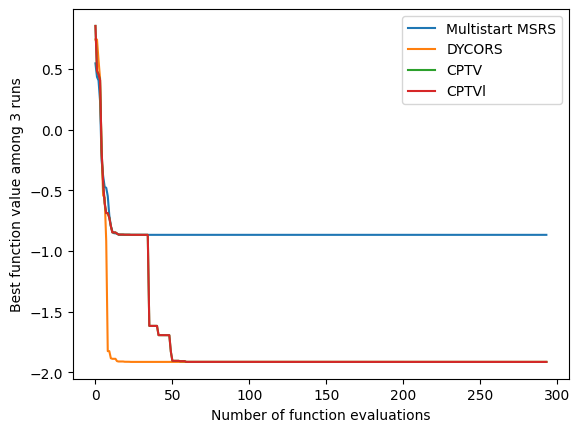

Problem bukin6
Minimum known value: 0.0
Minimum observed value: 0.049774997178192296 at [-7.07098233  0.49998787]
Average best value for Multistart MSRS: 0.44512584377145265
Average best value for DYCORS: 0.08682172472019224
Average best value for CPTV: 0.10584973755227682
Average best value for CPTVl: 0.10584973755227682


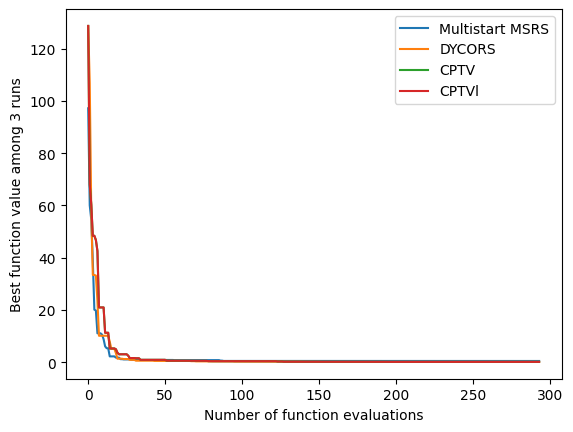

Problem camel6
Minimum known value: -1.0316
Minimum observed value: -1.0316284533405815 at [-0.08984272  0.7126522 ]
Average best value for Multistart MSRS: -0.48751857225515405
Average best value for DYCORS: -1.0316284531597983
Average best value for CPTV: -1.0316283390113796
Average best value for CPTVl: -1.0316283477397674


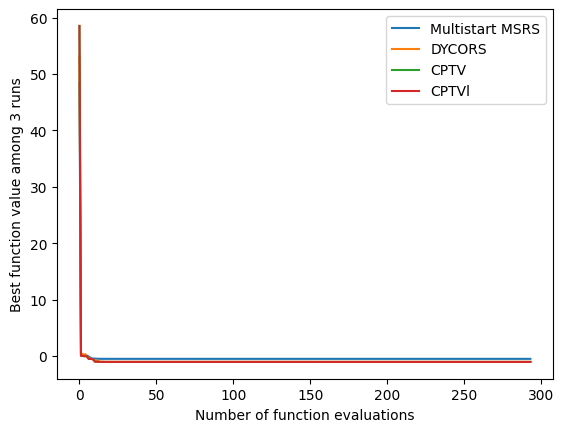

In [4]:
avgBestVals = {}
minBestPts = {}
minBestVals = {rFunc: np.inf for rFunc in myFuncStr}

for a in myAlgorithmStr:
    avgBestVals[a] = {}
    for rFunc in myFuncStr:
        # Compute average best values for each problem solved by an algorithm
        aux = np.array(
            [
                np.minimum.accumulate(optres[a][rFunc][i].fsample).tolist()
                for i in range(nTrials)
            ]
        )
        avgBestVals[a][rFunc] = np.mean(aux, axis=0)

        # Compute the best values overall all algorithms for a given problem
        idx = np.argmin(aux)
        row_idx, col_idx = np.unravel_index(idx, aux.shape)
        if aux[row_idx, col_idx] < minBestVals[rFunc]:
            minBestPts[rFunc] = optres[a][rFunc][row_idx].sample[col_idx]
            minBestVals[rFunc] = aux[row_idx, col_idx]

# For each problem, compares how good an algorithm can estimate the global
# minimum
for rFunc in myFuncStr:
    print(f"Problem {rFunc}")
    print(f"Minimum known value: {minVal[rFunc]}")
    print(
        f"Minimum observed value: {minBestVals[rFunc]} at {minBestPts[rFunc]}"
    )
    for a in myAlgorithmStr:
        print(
            "Average best value for "
            + a
            + ": "
            + str(avgBestVals[a][rFunc][-1])
        )
        plt.plot(avgBestVals[a][rFunc], label=a)
    plt.xlabel("Number of function evaluations")
    plt.ylabel(f"Best function value among {nTrials} runs")
    plt.legend()
    plt.show()

We can summarize those results using two metrics, both based on the number of function evaluations $\ell_{\gamma,a}$ that an algorithm $a$ needs to solve a problem $\gamma$. We say a problem is solved by the algorithm if the best value the algorithm encounters is at most 1% above from the known solution. If the known solution is 0, then we use the absolute tolerance of 1e-6 for the best value.

For the first metric, we define the performance ratio, as $\ell_{\gamma,a} / \min_a \ell_{\gamma,a}$, which goes from 1 to infinity. The $\rho_a(\alpha)$ metric of an algorithm $a$ is the number of problems that the algorithm can solve with performance ratio of at most $\alpha$, divided by the total number of problems.

The second metric is $\delta_a(\kappa)$. It measures how many problems an algorithm $a$ can solve with $\kappa (n+1)$ iterations, divided by the total number of problems. The value $n$ is the number of dimensions in the domain space, and $\kappa$ is a metric known as the number of simplex gradients in a $n$-dimensional space.

In [5]:
rtau = 1e-2  # Relative tolerance to consider the algorithm has converged
atau = 1e-6  # Absolute tolerance to consider the algorithm has converged, only used when the known minimum is zero.

# Number of function evaluations for an algorithm to converge for a given problem.
lpa = {}
for a in myAlgorithmStr:
    lpa[a] = {}
    for rFunc in myFuncStr:
        count = 0
        if minVal[rFunc] == 0:
            while count < len(avgBestVals[a][rFunc]):
                if avgBestVals[a][rFunc][count] - minVal[rFunc] <= atau:
                    break
                else:
                    count += 1
        else:
            while count < len(avgBestVals[a][rFunc]):
                if avgBestVals[a][rFunc][count] - minVal[rFunc] <= rtau * abs(minVal[rFunc]):
                    break
                else:
                    count += 1

        lpa[a][rFunc] = count + 1


# minimum number of function evaluations needed for every problem
minlpa = {}
for rFunc in myFuncStr:
    minlpa[rFunc] = np.min([lpa[a][rFunc] for a in myAlgorithmStr])

# performance ratio, lpa / min(lpa). Lower is better
rpa = {}
for a in myAlgorithmStr:
    rpa[a] = {}
    for rFunc in myFuncStr:
        if lpa[a][rFunc] <= maxIter[rFunc]:
            rpa[a][rFunc] = lpa[a][rFunc] / minlpa[rFunc]
        else:
            rpa[a][rFunc] = np.inf

# Rho measure: Average performance ratio of an algorithm
nAlpha = 100
alpha = np.linspace(1.0, 4.0, nAlpha)
rho = {}
for a in myAlgorithmStr:
    rho[a] = np.zeros(nAlpha)
    for k in range(len(alpha)):
        count = 0
        for rFunc in myFuncStr:
            if rpa[a][rFunc] <= alpha[k]:
                count += 1
        rho[a][k] = count / len(myFuncStr)

# delta measure: Average number of function evaluations an algorithm needed.
# Use number of simplex gradients to compare problems with domains with
# different number of dimensions.
maxKappa = 98
delta = {}
for a in myAlgorithmStr:
    delta[a] = np.zeros(maxKappa + 1)
    for k in range(1, maxKappa + 1):
        count = 0
        for rFunc in myFuncStr:
            if lpa[a][rFunc] / (myNArgs[rFunc] + 1) <= k:
                count += 1
        delta[a][k] = count / len(myFuncStr)

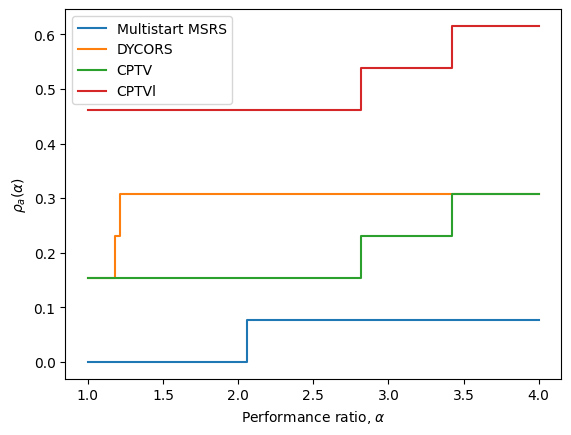

In [6]:
iter = 0
deltaStep = 0.0
for a in myAlgorithmStr:
    plt.step(alpha, rho[a] + deltaStep * iter, where="post", label=a)
    iter += 1
plt.xlabel(r"Performance ratio, $\alpha$")
plt.ylabel(r"$\rho_a(\alpha)$")
plt.legend()
plt.show()

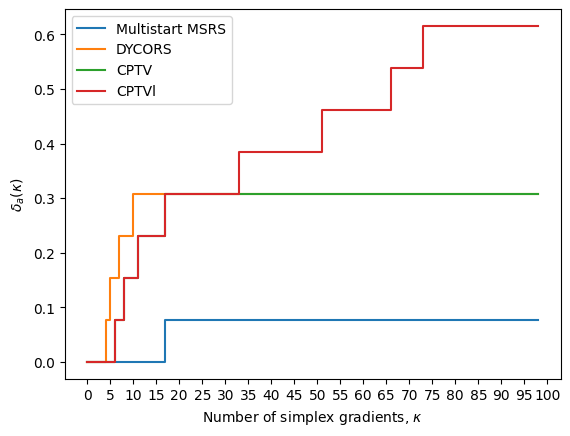

In [7]:
iter = 0
deltaStep = 0.0
for a in myAlgorithmStr:
    plt.step(
        np.arange(0, maxKappa + 1),
        delta[a] + deltaStep * iter,
        where="post",
        label=a,
    )
    iter += 1
plt.xlabel(r"Number of simplex gradients, $\kappa$")
plt.xticks(range(0, 101, 5))
plt.ylabel(r"$\delta_a(\kappa)$")
plt.legend()
plt.show()